In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Read the CSV file into a Pandas DataFrame
Lp100km = pd.read_csv('https://static.bc-edx.com/mbc/ai/m3/datasets/liters-per-100km.csv')
Lp100km.head()

,L/100km,cylinders,displacement,horsepower,weight (kg),acceleration
0,13.07,8,307.0,130,1589.12,12.0
1,15.68,8,350.0,165,1674.83,11.5
2,13.07,8,318.0,150,1558.28,11.0
3,14.70,8,304.0,150,1556.92,12.0
4,13.84,8,302.0,140,1564.17,10.5


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
Lp100km.dtypes

L/100km         float64
cylinders         int64
displacement    float64
horsepower       object
weight (kg)     float64
acceleration    float64
dtype: object

In [5]:
Lp100km.isnull().any()

L/100km         False
cylinders       False
displacement    False
horsepower      False
weight (kg)     False
acceleration    False
dtype: bool

In [6]:
Lp100km.cylinders.unique()

array([8, 4, 6, 3, 5])

In [7]:
Lp100km.shape

(398, 6)

In [8]:
Lp100km.describe()

,L/100km,cylinders,displacement,weight (kg),acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,11.212965,5.454774,193.425879,1347.131583,15.568090
std,3.901596,1.701004,104.269838,384.055062,2.757689
min,5.050000,3.000000,68.000000,731.520000,8.000000
25%,8.110000,4.000000,104.250000,1008.500000,13.825000
50%,10.230000,4.000000,148.500000,1271.430000,15.500000
75%,13.440000,8.000000,262.000000,1636.277500,17.175000
max,26.140000,8.000000,455.000000,2331.070000,24.800000


<Axes: xlabel='L/100km', ylabel='Density'>

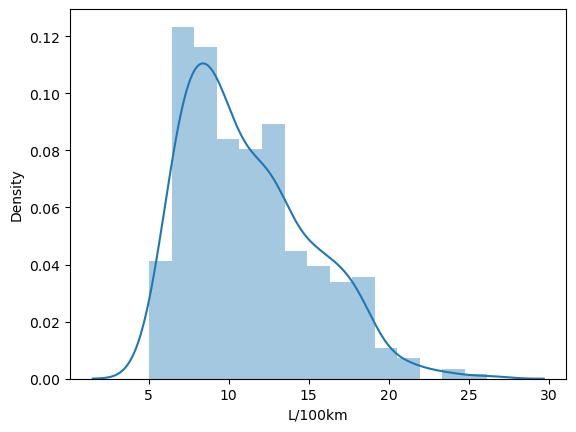

In [9]:
sns.distplot(Lp100km['L/100km'])

In [ ]:
var

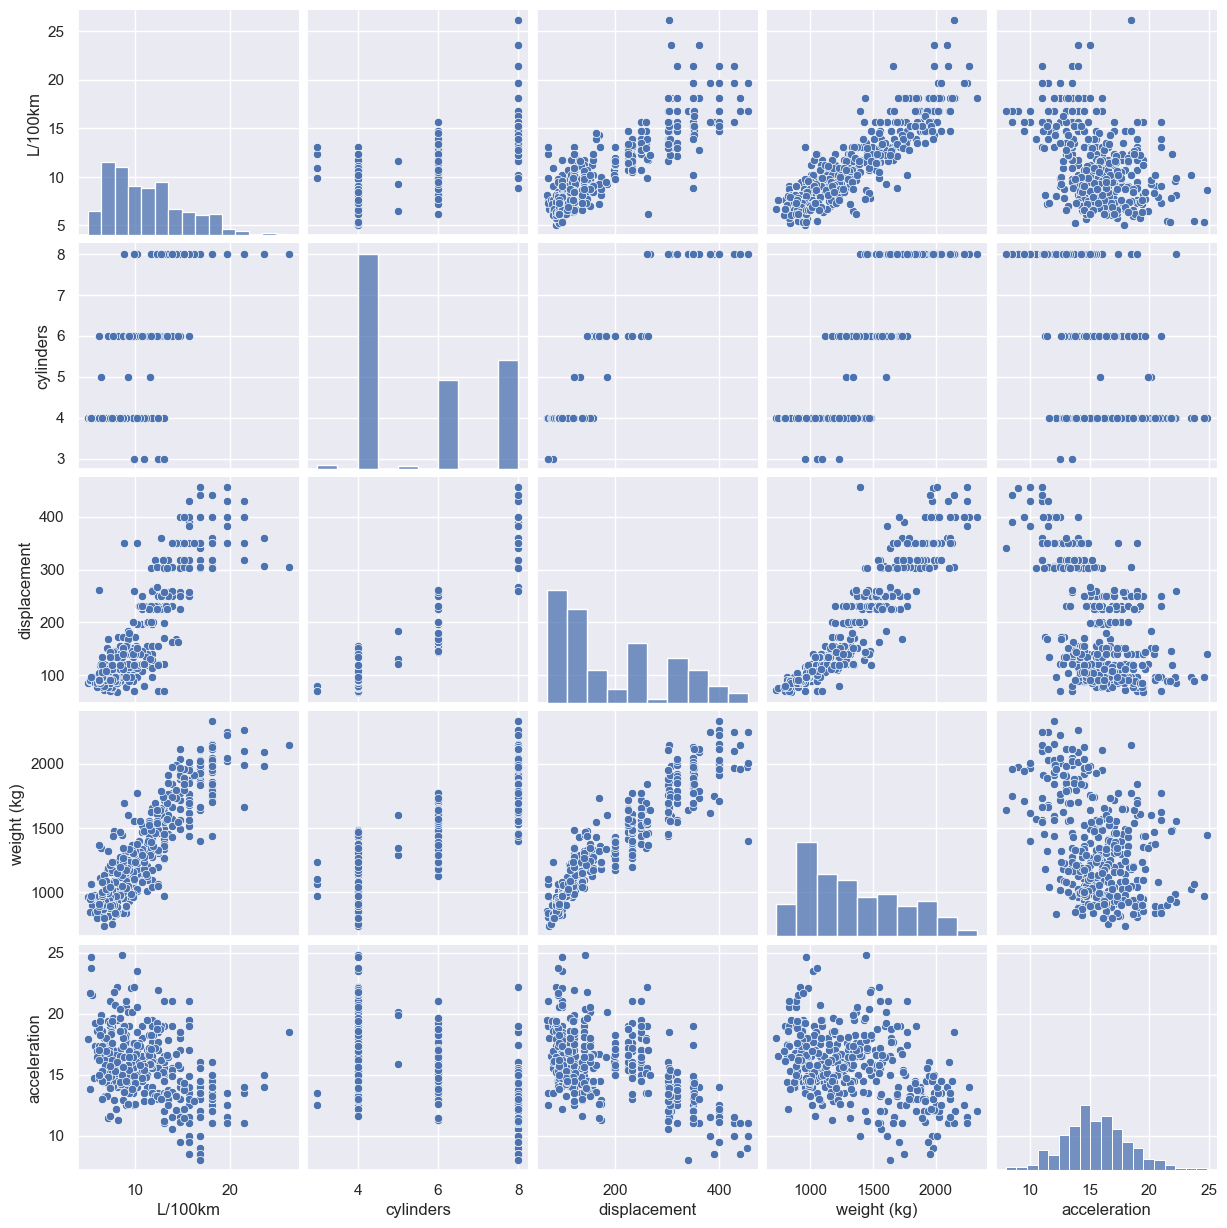

In [15]:
#scatterplot
sns.set()
sns.pairplot(Lp100km)
plt.show()

## Visualize the Data to Find Any Linear Trends

<Axes: xlabel='cylinders', ylabel='L/100km'>

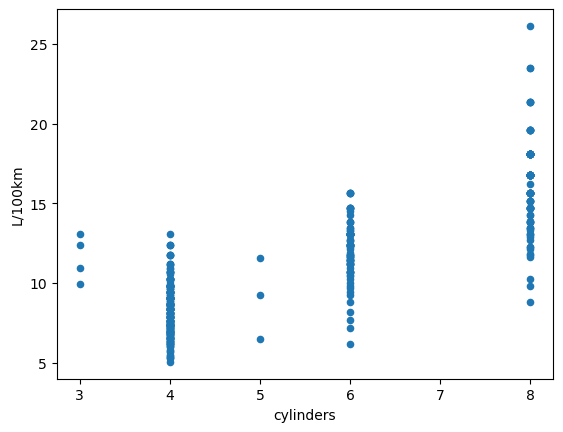

In [10]:
# Plot the cylinders & L/100km to find out if a linear trend exists
Lp100km.plot.scatter(x='cylinders', y='L/100km')

<Axes: xlabel='displacement', ylabel='L/100km'>

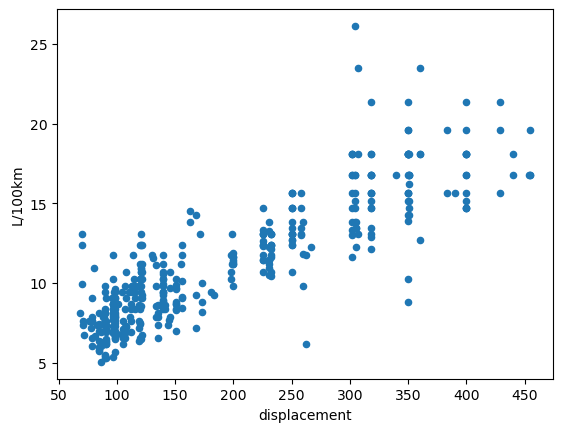

In [11]:
# Plot the displacement & L/100km to find out if a linear trend exists

Lp100km.plot.scatter(x='displacement', y='L/100km')

<Axes: xlabel='horsepower', ylabel='L/100km'>

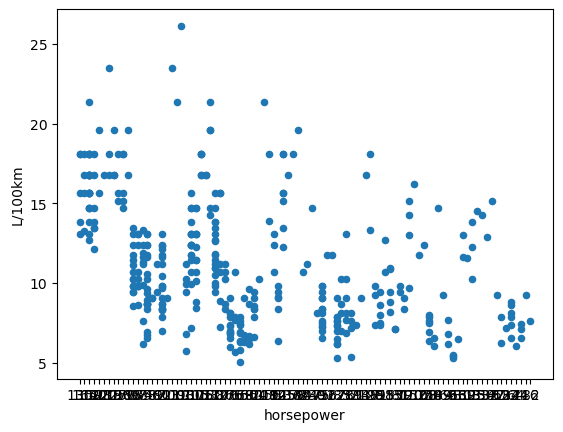

In [12]:
# Plot the horesepower & L/100km to find out if a linear trend exists

Lp100km.plot.scatter(x='horsepower', y='L/100km')

<Axes: xlabel='weight (kg)', ylabel='L/100km'>

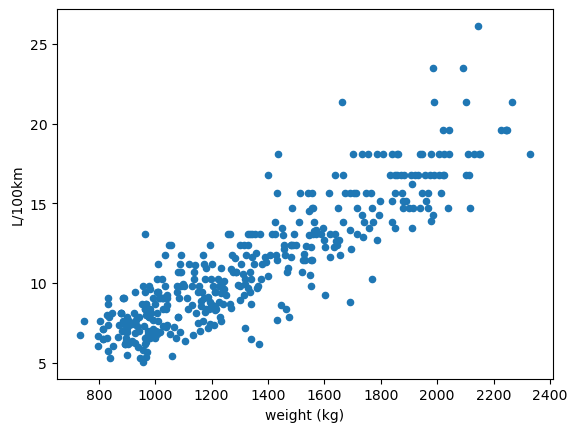

In [13]:
# Plot the weight (kg) & L/100km to find out if a linear trend exists

Lp100km.plot.scatter(x='weight (kg)', y='L/100km')

<Axes: xlabel='acceleration', ylabel='L/100km'>

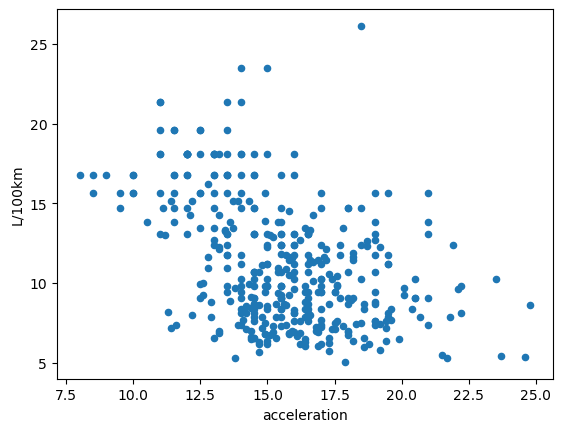

In [14]:
# Plot the acceleration & L/100km to find out if a linear trend exists

Lp100km.plot.scatter(x='acceleration', y='L/100km')

In [16]:
# Assign the variable to X to the two features that appear to have the most linear relationship with Lp100km
# Note: Scikit-learn requires a two-dimensional array of values
# so we use reshape() to create this

X = Lp100km[["weight (kg)", "displacement"]].values.reshape(-1, 2)
y = Lp100km["L/100km"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (398, 2) (398, 1)


In [17]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Create the model
model = LinearRegression()

In [19]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 2.874707548656505
R-squared (R2): 0.8131423420344738


In [21]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test, y_test)

0.8131423420344738

In [ ]:
predicted

In [22]:
 model.coef_

array([[0.00555962, 0.01397061]])

In [23]:
model.intercept_ 

array([1.01423155])